# Import libraries 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import csv file

In [2]:
df_candy = pd.read_csv("/Users\Lenovo\Documents\candy-data.csv")
df_candy.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


# Here I should get toknow my data (see. candy-data-jupyter-notebook.ipynb)

# Now im looking at correlations with my DV

In [3]:
df_candy.corr(numeric_only=True)["winpercent"]

chocolate           0.636517
fruity             -0.380938
caramel             0.213416
peanutyalmondy      0.406192
nougat              0.199375
crispedricewafer    0.324680
hard               -0.310382
bar                 0.429929
pluribus           -0.247448
sugarpercent        0.229151
pricepercent        0.345325
winpercent          1.000000
Name: winpercent, dtype: float64

In [4]:
X_train = df_candy[["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus", "sugarpercent", "pricepercent"]].values
print(X_train)

[[1.         0.         1.         0.         0.         1.
  0.         1.         0.         0.73199999 0.86000001]
 [1.         0.         0.         0.         1.         0.
  0.         1.         0.         0.60399997 0.51099998]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.011      0.116     ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.011      0.51099998]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.90600002 0.51099998]
 [1.         0.         0.         1.         0.         0.
  0.         1.         0.         0.465      0.76700002]
 [1.         0.         1.         1.         1.         0.
  0.         1.         0.         0.60399997 0.76700002]
 [0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.31299999 0.51099998]
 [0.         0.         0.         0.         0.        

In [5]:
y_train = df_candy["winpercent"].values
print(y_train)

[66.971725 67.602936 32.261086 46.116505 52.341465 50.347546 56.914547
 23.417824 38.010963 34.517681 38.975037 36.017628 24.524988 42.272076
 39.460556 43.088924 39.185505 46.783348 57.11974  34.158958 51.41243
 42.178772 55.375454 62.284481 56.490501 59.236122 28.127439 57.21925
 76.7686   41.389557 39.141056 52.911392 71.46505  66.574585 46.411716
 55.064072 73.099556 60.800701 64.35334  47.829754 54.526451 55.354046
 70.735641 66.47068  22.445341 39.4468   46.296597 69.483788 37.722336
 41.265511 37.348522 81.866257 84.18029  73.43499  72.887901 35.290756
 65.716286 29.703691 42.849144 34.722    63.08514  55.103695 37.887188
 45.995827 76.673782 59.529251 59.863998 52.825947 67.037628 34.578991
 33.43755  32.230995 27.303865 54.861111 48.982651 43.068897 45.736748
 49.653503 47.173229 81.642914 45.466282 39.011898 44.375519 41.904308
 49.524113]


In [6]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [7]:
#predict the "winpercent" of a candy like "100 Grand" (real rating = 66.97) which contains "chocolate", "caramel", "crispedricewafer", "bar", and 0.73 "sugarpercent" and 0.86 "pricepercent":
predicted_winpercent = regr.predict([[1, 0, 1, 0, 0, 1, 0, 1, 0, 0.73, 0.86]])
print(predicted_winpercent)

[67.40198272]


In [8]:
sklearn_y_predictions = regr.predict(X_train)
print(sklearn_y_predictions)

[67.4201561  57.98692801 33.94624288 31.60454024 49.15951525 64.47256535
 68.76443708 43.56493145 39.9853688  49.74246894 57.98692801 46.72391869
 41.59307463 46.72391869 44.24092    44.05425552 42.5157669  42.48353399
 44.57045761 35.14813554 44.57045761 44.57045761 54.03022711 62.10762775
 53.18865794 53.18865794 34.75215083 52.18824556 63.45731941 45.26769839
 37.59241548 44.72845318 67.13545018 57.06476171 49.09874057 55.36683694
 59.38143854 61.78950033 60.61840185 52.46935129 62.19619497 42.71533185
 65.73562512 61.93965865 39.10581241 43.17417136 45.52882898 65.0273212
 34.38819552 37.46284036 47.69351996 63.00767092 67.03583998 63.32809654
 69.47109198 38.7216157  58.36825248 33.75660577 43.20611857 54.9464364
 50.3482051  50.3482051  50.06763063 38.6749501  68.92509504 77.56676622
 43.04109763 43.04109763 43.16966253 41.76299765 40.12563279 38.63000934
 44.74066614 44.11429256 61.10072805 54.09680951 54.94343052 57.02221281
 44.43422546 65.45731361 45.26769839 37.94835302 44.0

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
print("Mean absolute error: " + str(mean_absolute_error(sklearn_y_predictions, y_train)))
print("Mean squared error: " + str(mean_squared_error(sklearn_y_predictions, y_train)))

Mean absolute error: 7.955402203016126
Mean squared error: 98.37927075848414


# Diese Scatter Matrix war ein voller fail, aber das Prinzip macht sinn für die Variablen, die nicht dichotomous sind

In [11]:
from pandas.plotting import scatter_matrix

In [12]:
# scatter_matrix(df_candy, figsize=(20,20))
# plt.show

# Get to know scipy (mit nem Inder)

# scipy: Confidence Intervals, t-Distribution; numpy: Mean, Median

Import libraries part 2:

In [13]:
from scipy import stats
from scipy.stats import linregress, t

In [14]:
samp_data = [15, 15, 15, 15, 14, 17, 18, 21, 22, 24, 26, 29, 29,30, 25]

In [15]:
stats.t.interval(confidence=0.95, loc=np.mean(samp_data), df=len(samp_data)-1, scale=stats.sem(samp_data))

(17.764149813840643, 24.235850186159357)

In [16]:
print(np.mean(samp_data))
print(np.median(samp_data))

21.0
21.0


In [17]:
# There was some mistake in this code:
# scipy.stats.linregress(X_data, y_data, alternate="less")

# scipy: Simple Linear Regression, Intercept, Slope, Regressionline

In [18]:
rand_numgen = np.random.default_rng(3)
X_data = rand_numgen.random(15)
y_data = 1.5*X_data + rand_numgen.random(15)

In [19]:
lin_res = linregress(X_data, y_data)

In [20]:
print("Slope", lin_res.slope)
print("Intercept", lin_res.intercept)

Slope 1.4045125427669276
Intercept 0.5689065772815937


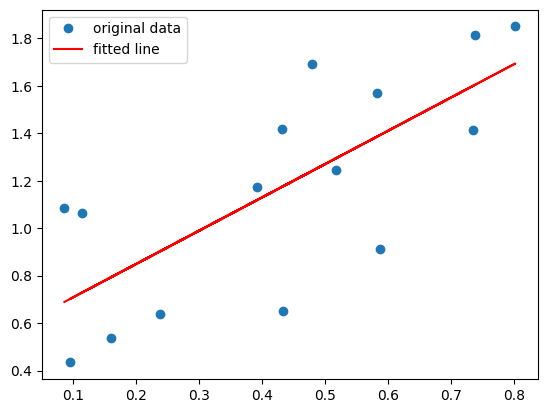

In [21]:
plt.plot(X_data, y_data, "o", label="original data")
plt.plot(X_data, lin_res.intercept + lin_res.slope*X_data, "r", label="fitted line")
plt.legend()

# scipy: Mean Difference Confidence Interval

In [22]:
alp =0.05
samp_data1 = np.array([14,17, 10, 19, 7, 20])
samp_data2 = np.array([3, 2, 10, 16, 10, 8])
diffsamp = samp_data1 - samp_data2

In [23]:
len_no_obs= len(samp_data1)

In [24]:
diffmean = np.mean(diffsamp)
diffvar = np.var(diffsamp, ddof=1)
criticalvalue = stats.t.ppf(q = 1-alp/2, df = len_no_obs - 1)
rad = criticalvalue*np.sqrt(diffvar)/np.sqrt(len_no_obs)

In [25]:
# compute CI difference
print("The mean difference between our 2 samples is: " + str(diffmean))
print("Our 95% CI reaches from: " + str(diffmean - rad) + " to " + str(diffmean + rad))

The mean difference between our 2 samples is: 6.333333333333333
Our 95% CI reaches from: -1.3402349840535628 to 14.006901650720229


# scipy: Confidence Interval from a random sample to a population

In [26]:
def m_conf_intval(samp_data, confid=0.95):
    data = 1.0 * np.array(samp_data)
    len_n = len(data)
    mean, std_err = np.mean(data), stats.sem(data)
    h = std_err * stats.t.ppf((1 + confid) / 2., len_n-1)
    return mean, mean-h, mean+h

In [27]:
data = [2, 4, 6, 3, 8, 9, 4]
m_conf_intval(data)

(5.142857142857143, 2.729466217951526, 7.556248067762761)

# scipy: Confidence Interval Binominal

In [28]:
samp_data_binom = [2, 5, 3, 7, 9, 5, 7, 2, 6, 7]
print(np.mean(samp_data_binom))
print(stats.sem(samp_data_binom))

5.3
0.7461009761866464


In [29]:
stats.binom.interval(confidence=0.99,
                    n=len(samp_data_binom)-1,
                    loc=np.mean(samp_data_binom),
                    p=stats.sem(samp_data_binom))

(8.3, 14.3)

# Confidence Intervals (mit nem Ami)

Right now unimportant, because he explains CIs for sample estimations of a population 

# A very sexy Simple Linear Regression (mit nem anderen Ami)

I will be using patsy, I probably includes Confidence Intervals, Rsquared and other fun things

In [30]:
import seaborn as sns

In [31]:
import statsmodels.formula.api as smf

In [38]:
import patsy

In [39]:
# With the following code I can create a matrix of scatterplots showing the correlations between all of my variables
# hue="competitornam" makes every Candyname have a different colour in those scatterplots
# sns.pairplot(df_candy, hue="competitorname")

In [52]:
y_data = df_candy["winpercent"]
y_data.head(3)

0    66.971725
1    67.602936
2    32.261086
Name: winpercent, dtype: float64

In [53]:
X_data = df_candy["sugarpercent"]
X_data.head(3)

0    0.732
1    0.604
2    0.011
Name: sugarpercent, dtype: float64

In [54]:
data = pd.concat([X_data, y_data], axis=1, keys=['X_data', 'y_data'])
data.head(3)

,X_data,y_data
0,0.732,66.971725
1,0.604,67.602936
2,0.011,32.261086


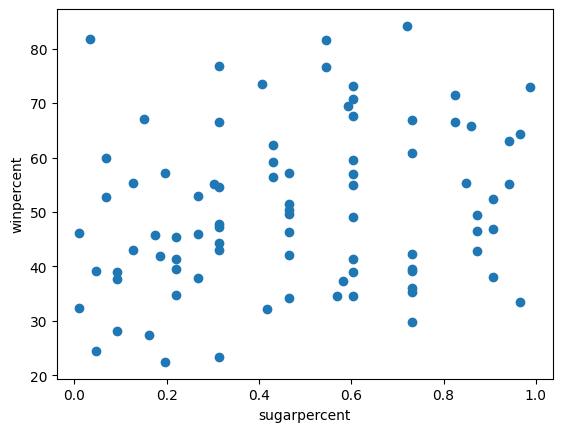

In [55]:
plt.scatter(X_data, y_data)
plt.xlabel("sugarpercent")
plt.ylabel("winpercent")
plt.show()

In [56]:
y_dm, X_dm = patsy.dmatrices("y_data ~ X_data", data)

In [60]:
# nice

In [62]:
# Define a matrix A
# A = np.array([[1, 2, 3], [4, 5, 6]])

# Compute the pseudoinverse of A
# A_pinv = np.linalg.pinv(A)

# Fuer mich bedeutet das:
X_dm_pinv = np.linalg.pinv(X_dm)

In [63]:
print(X_dm_pinv)

[[-0.0062892   0.00283207  0.04508919  0.04508919 -0.01868843  0.01273719
   0.00283207  0.0235687  -0.01868843  0.00283207  0.00283207 -0.0062892
   0.0425951  -0.0062892  -0.0062892   0.03682304 -0.0062892  -0.01868843
   0.01273719  0.01273719  0.01273719  0.01273719  0.03682304  0.01523129
   0.01523129  0.01523129  0.03924588  0.03183485  0.0235687   0.03019587
   0.0425951   0.02684666 -0.01291637 -0.01291637 -0.01626559  0.02435256
   0.00283207 -0.0062892  -0.02289276  0.0235687   0.0235687  -0.01455535
   0.00283207  0.0235687   0.03183485  0.03019587  0.01273719  0.00361593
   0.03924588  0.00283207  0.00447105  0.04345021 -0.00543409  0.01694153
  -0.02453174 -0.0062892  -0.01541047 -0.0062892  -0.01626559  0.03019587
  -0.02118252 -0.02118252  0.02684666  0.02684666  0.00696514  0.00283207
   0.04095612  0.04095612  0.03511281  0.00532616 -0.02289276  0.01608641
   0.03432895  0.00283207  0.00283207  0.0235687   0.03347383  0.01273719
   0.0235687   0.00696514  0.03019587  

In [66]:
X_dm_pinv @ y_dm

array([[44.60944181],
       [11.92386329]])

Now do a fully automated version of Simple Linear Regression using statsmodels

In [67]:
import statsmodels.api as sm

In [68]:
fit = sm.OLS(endog=y_dm, exog=X_dm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_data   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.600
Date:                Sat, 25 Feb 2023   Prob (F-statistic):             0.0349
Time:                        19:23:16   Log-Likelihood:                -346.36
No. Observations:                  85   AIC:                             696.7
Df Residuals:                      83   BIC:                             701.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6094      3.086     14.455      0.000      38.471      50.748
X_data        11.9239      5.560      2.145      0.035       0.866      22.982
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.845
Skew:                           0.379   Prob(JB):                        0.241
Kurtosis:                       2.523   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Even more sexy a fully automated version of S.L.Regression using statsmodels.formula.api (We imported this further up)
The advantage of this is that we dont need to construct design matrices (e.g. y_dm, X_dm).
For the variable data see the lines of code directly after "A very sexy Simple Linear Regression (mit nem anderen Ami)"

In [69]:
fit_new = smf.ols("y_data ~ X_data", data).fit()
fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_data   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.600
Date:                Sat, 25 Feb 2023   Prob (F-statistic):             0.0349
Time:                        19:44:46   Log-Likelihood:                -346.36
No. Observations:                  85   AIC:                             696.7
Df Residuals:                      83   BIC:                             701.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6094      3.086     14.455      0.000      38.471      50.748
X_data        11.9239      5.560      2.145      0.035       0.866      22.982
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.845
Skew:                           0.379   Prob(JB):                        0.241
Kurtosis:                       2.523   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

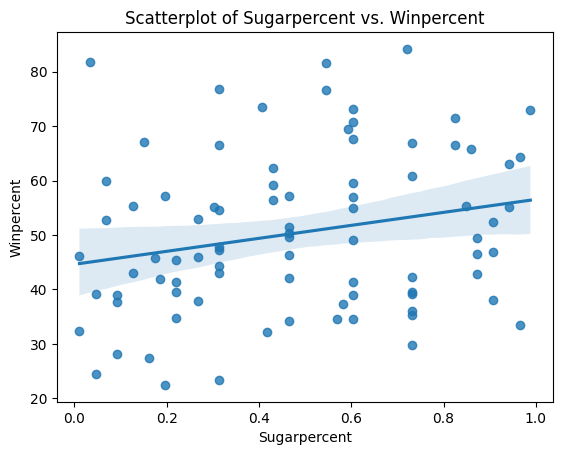

In [71]:
# Create a scatterplot of sugarpercent vs. winpercent
sns.regplot(x="sugarpercent", y="winpercent", data=df_candy)

# Add axis labels and a title
plt.xlabel("Sugarpercent")
plt.ylabel("Winpercent")
plt.title("Scatterplot of Sugarpercent vs. Winpercent")

# Show the plot
plt.show()

# Multiple Linear Regression (der gleiche Ami wie Simple Linear Regression)

Sexysexy

In [72]:
df_candy.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Ok now let's look at the correlations between my IVs and my DV
Info: We plotted the Scatterplot of "sugarpercent" vs. "winpercent" some lines further up so we dont have to do it here again

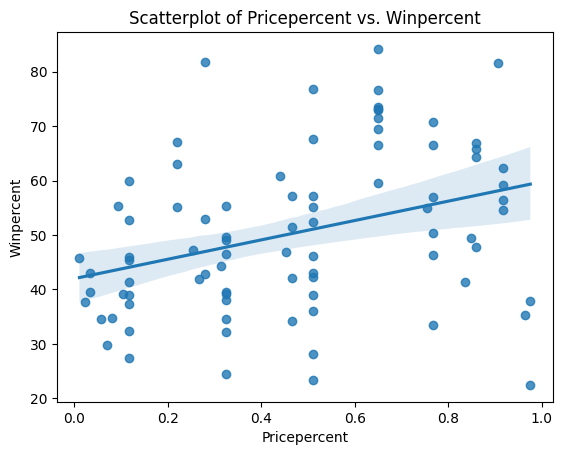

In [75]:
# Create a scatterplot of sugarpercent vs. winpercent
sns.regplot(x="pricepercent", y="winpercent", data=df_candy)

# Add axis labels and a title
plt.xlabel("Pricepercent")
plt.ylabel("Winpercent")
plt.title("Scatterplot of Pricepercent vs. Winpercent")

# Show the plot
plt.show()

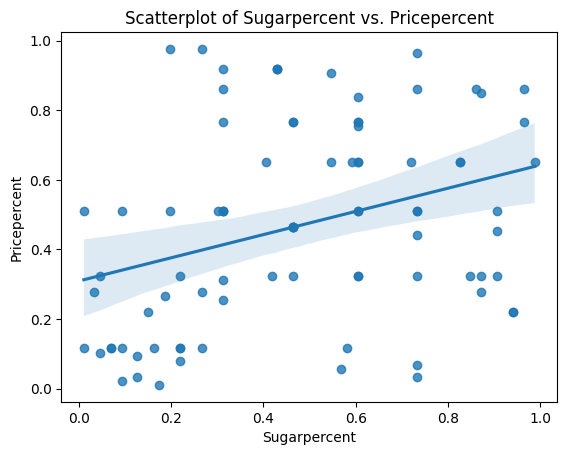

In [76]:
# just for fun we'll also look at the scatterplot of both IVs ("sugarpercent" and "pricepercent")

# Create a scatterplot of "sugarpercent" and "pricepercent"
sns.regplot(x="sugarpercent", y="pricepercent", data=df_candy)

# Add axis labels and a title
plt.xlabel("Sugarpercent")
plt.ylabel("Pricepercent")
plt.title("Scatterplot of Sugarpercent vs. Pricepercent")

# Show the plot
plt.show()

In [80]:
# Clarify my Criterion and my Predictors

y_mlregression_winpercent = df_candy["winpercent"]
x1_mlregression_sugarpercent = df_candy["sugarpercent"]
x2_mlregression_pricepercent = df_candy["pricepercent"]

mlregression_data = pd.concat([x1_mlregression_sugarpercent, x2_mlregression_pricepercent, y_mlregression_winpercent], axis=1, keys=['x1_mlregression_sugarpercent', "x2_mlregression_pricepercent", 'y_mlregression_winpercent'])
mlregression_data.head(3)

,x1_mlregression_sugarpercent,x2_mlregression_pricepercent,y_mlregression_winpercent
0,0.732,0.860,66.971725
1,0.604,0.511,67.602936
2,0.011,0.116,32.261086


In [82]:
fit_new_mlr = smf.ols("y_mlregression_winpercent ~ x1_mlregression_sugarpercent + x2_mlregression_pricepercent", mlregression_data).fit()
fit_new_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     y_mlregression_winpercent   R-squared:                       0.134
Model:                                   OLS   Adj. R-squared:                  0.113
Method:                        Least Squares   F-statistic:                     6.353
Date:                       Sat, 25 Feb 2023   Prob (F-statistic):            0.00272
Time:                               20:54:11   Log-Likelihood:                -342.53
No. Observations:                         85   AIC:                             691.1
Df Residuals:                             82   BIC:                             698.4
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       39.7867      3.438     11.574      0.000      32.948      46.625
x1_mlregression_sugarpercent     6.7311      5.664      1.188      0.238      -4.536      17.998
x2_mlregression_pricepercent    15.5865      5.605      2.781      0.007       4.436      26.737
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.467
Skew:                           0.180   Prob(JB):                        0.792
Kurtosis:                       2.946   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

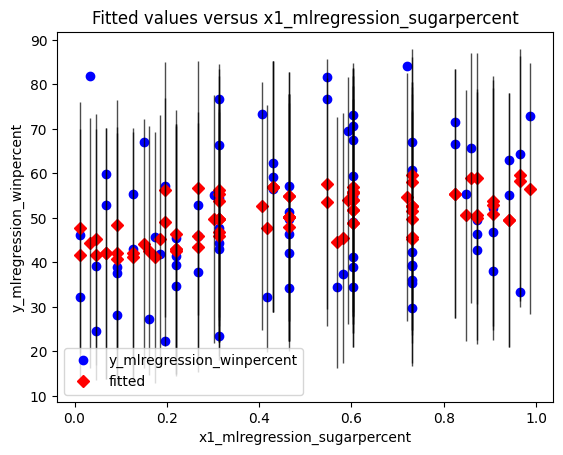

In [85]:
sm.graphics.plot_fit(fit_new_mlr, "x1_mlregression_sugarpercent");

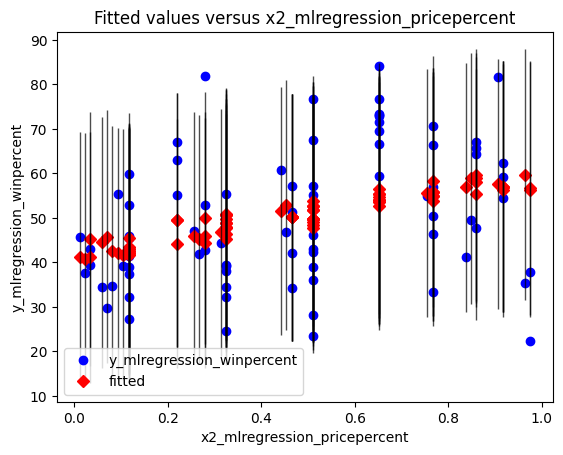

In [86]:
sm.graphics.plot_fit(fit_new_mlr, "x2_mlregression_pricepercent");